In [1]:
!pip install qiskit qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.1 MB/s eta 0:00:00


In [2]:
# Quantum Phase Estimation (QPE) using Qiskit 2.x

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt

def qpe_circuit(num_count_qubits, unitary, theta):
    """
    Constructs the Quantum Phase Estimation (QPE) circuit.
    num_count_qubits: number of counting qubits
    unitary: unitary gate (to apply controlled operations)
    theta: phase parameter (for U gate)
    """
    qc = QuantumCircuit(num_count_qubits + 1, num_count_qubits)

    # Step 1: Apply Hadamard gates on counting qubits
    qc.h(range(num_count_qubits))

    # Step 2: Prepare eigenstate (|1>) for the target qubit
    qc.x(num_count_qubits)

    # Step 3: Apply controlled unitary operations
    for qubit in range(num_count_qubits):
        qc.cp(2 * np.pi * theta * (2 ** qubit), qubit, num_count_qubits)

    # Step 4: Apply inverse QFT to counting qubits
    inverse_qft(qc, num_count_qubits)

    # Step 5: Measure counting qubits
    qc.measure(range(num_count_qubits), range(num_count_qubits))

    return qc

In [3]:
def inverse_qft(qc, n):
    """Apply the inverse Quantum Fourier Transform on n qubits."""
    for qubit in range(n // 2):
        qc.swap(qubit, n - qubit - 1)
    for j in range(n):
        for k in range(j):
            qc.cp(-np.pi / 2 ** (j - k), k, j)
        qc.h(j)
    return qc

In [4]:
def run_qpe(num_count_qubits=3, theta=0.125):
    """Executes the QPE circuit and visualizes the phase estimation result."""
    simulator = AerSimulator()
    qc = qpe_circuit(num_count_qubits, "U", theta)
    compiled_circuit = transpile(qc, simulator)
    result = simulator.run(compiled_circuit, shots=2048).result()
    counts = result.get_counts()
    plot_histogram(counts)
    plt.show()
    print(qc.draw(output='text'))

In [5]:
if __name__ == "__main__":
    num_count_qubits = 3
    theta = 0.125  # phase value (1/8)
    print(f"Running Quantum Phase Estimation with {num_count_qubits} counting qubits and phase {theta}")
    run_qpe(num_count_qubits, theta)

Running Quantum Phase Estimation with 3 counting qubits and phase 0.125
     ┌───┐                            ┌───┐                                   »
q_0: ┤ H ├─■────────────────────────X─┤ H ├─■──────────────■──────────────────»
     ├───┤ │                        │ └───┘ │P(-π/2) ┌───┐ │                  »
q_1: ┤ H ├─┼────────■───────────────┼───────■────────┤ H ├─┼─────────■────────»
     ├───┤ │        │               │                └───┘ │P(-π/4)  │P(-π/2) »
q_2: ┤ H ├─┼────────┼────────■──────X──────────────────────■─────────■────────»
     ├───┤ │P(π/4)  │P(π/2)  │P(π)                                            »
q_3: ┤ X ├─■────────■────────■────────────────────────────────────────────────»
     └───┘                                                                    »
c: 3/═════════════════════════════════════════════════════════════════════════»
                                                                              »
«     ┌─┐           
«q_0: ┤M├───────────
«     

In [6]:
#Change the Phase Value Try different values of theta (e.g., 0.25, 0.375, 0.5) and see how the measured output changes.
if __name__ == "__main__":
    num_count_qubits = 3
    theta = 0.25
    print(f"Running Quantum Phase Estimation with {num_count_qubits} counting qubits and phase {theta}")
    run_qpe(num_count_qubits, theta)

Running Quantum Phase Estimation with 3 counting qubits and phase 0.25
     ┌───┐                           ┌───┐                                   »
q_0: ┤ H ├─■───────────────────────X─┤ H ├─■──────────────■──────────────────»
     ├───┤ │                       │ └───┘ │P(-π/2) ┌───┐ │                  »
q_1: ┤ H ├─┼────────■──────────────┼───────■────────┤ H ├─┼─────────■────────»
     ├───┤ │        │              │                └───┘ │P(-π/4)  │P(-π/2) »
q_2: ┤ H ├─┼────────┼──────■───────X──────────────────────■─────────■────────»
     ├───┤ │P(π/2)  │P(π)  │P(2π)                                            »
q_3: ┤ X ├─■────────■──────■─────────────────────────────────────────────────»
     └───┘                                                                   »
c: 3/════════════════════════════════════════════════════════════════════════»
                                                                             »
«     ┌─┐           
«q_0: ┤M├───────────
«     └╥┘     ┌─┐ 

In [7]:
#TASK-1
#Change the Phase Value Try different values of theta (e.g., 0.25, 0.375, 0.5) and see how the measured output changes.
if __name__ == "__main__":
    num_count_qubits = 3
    theta = 0.375
    print(f"Running Quantum Phase Estimation with {num_count_qubits} counting qubits and phase {theta}")
    run_qpe(num_count_qubits, theta)

Running Quantum Phase Estimation with 3 counting qubits and phase 0.375
     ┌───┐                               ┌───┐                         »
q_0: ┤ H ├─■───────────────────────────X─┤ H ├─■──────────────■────────»
     ├───┤ │                           │ └───┘ │P(-π/2) ┌───┐ │        »
q_1: ┤ H ├─┼─────────■─────────────────┼───────■────────┤ H ├─┼────────»
     ├───┤ │         │                 │                └───┘ │P(-π/4) »
q_2: ┤ H ├─┼─────────┼─────────■───────X──────────────────────■────────»
     ├───┤ │P(3π/4)  │P(3π/2)  │P(3π)                                  »
q_3: ┤ X ├─■─────────■─────────■───────────────────────────────────────»
     └───┘                                                             »
c: 3/══════════════════════════════════════════════════════════════════»
                                                                       »
«               ┌─┐           
«q_0: ──────────┤M├───────────
«               └╥┘     ┌─┐   
«q_1: ─■─────────╫──────┤M├───
«

In [8]:
#Change the Phase Value Try different values of theta (e.g., 0.25, 0.375, 0.5) and see how the measured output changes.
if __name__ == "__main__":
    num_count_qubits = 3
    theta = 0.5
    print(f"Running Quantum Phase Estimation with {num_count_qubits} counting qubits and phase {theta}")
    run_qpe(num_count_qubits, theta)

Running Quantum Phase Estimation with 3 counting qubits and phase 0.5
     ┌───┐                          ┌───┐                                   ┌─┐»
q_0: ┤ H ├─■──────────────────────X─┤ H ├─■──────────────■──────────────────┤M├»
     ├───┤ │                      │ └───┘ │P(-π/2) ┌───┐ │                  └╥┘»
q_1: ┤ H ├─┼──────■───────────────┼───────■────────┤ H ├─┼─────────■─────────╫─»
     ├───┤ │      │               │                └───┘ │P(-π/4)  │P(-π/2)  ║ »
q_2: ┤ H ├─┼──────┼───────■───────X──────────────────────■─────────■─────────╫─»
     ├───┤ │P(π)  │P(2π)  │P(4π)                                             ║ »
q_3: ┤ X ├─■──────■───────■──────────────────────────────────────────────────╫─»
     └───┘                                                                   ║ »
c: 3/════════════════════════════════════════════════════════════════════════╩═»
                                                                             0 »
«                
«q_0: ───────────
«  

In [9]:
#TASK-2
#Increase the Number of Counting Qubits Use 4 or 5 counting qubits for higher precision phase estimation.


In [10]:

if __name__ == "__main__":
    num_count_qubits = 4
    theta = 0.5
    print(f"Running Quantum Phase Estimation with {num_count_qubits} counting qubits and phase {theta}")
    run_qpe(num_count_qubits, theta)

Running Quantum Phase Estimation with 4 counting qubits and phase 0.5
     ┌───┐                                  ┌───┐                         »
q_0: ┤ H ├─■──────────────────────────────X─┤ H ├─■──────────────■────────»
     ├───┤ │                              │ └───┘ │P(-π/2) ┌───┐ │        »
q_1: ┤ H ├─┼──────■─────────────────X─────┼───────■────────┤ H ├─┼────────»
     ├───┤ │      │                 │     │                └───┘ │P(-π/4) »
q_2: ┤ H ├─┼──────┼───────■─────────X─────┼──────────────────────■────────»
     ├───┤ │      │       │               │                               »
q_3: ┤ H ├─┼──────┼───────┼───────■───────X───────────────────────────────»
     ├───┤ │P(π)  │P(2π)  │P(4π)  │P(8π)                                  »
q_4: ┤ X ├─■──────■───────■───────■───────────────────────────────────────»
     └───┘                                                                »
c: 4/═════════════════════════════════════════════════════════════════════»
                  

In [11]:

if __name__ == "__main__":
    num_count_qubits = 5
    theta = 0.5
    print(f"Running Quantum Phase Estimation with {num_count_qubits} counting qubits and phase {theta}")
    run_qpe(num_count_qubits, theta)

Running Quantum Phase Estimation with 5 counting qubits and phase 0.5
     ┌───┐                                           ┌───┐               »
q_0: ┤ H ├─■───────────────────────────────────────X─┤ H ├─■─────────────»
     ├───┤ │                                       │ └───┘ │P(-π/2) ┌───┐»
q_1: ┤ H ├─┼──────■──────────────────────────X─────┼───────■────────┤ H ├»
     ├───┤ │      │                          │     │                └───┘»
q_2: ┤ H ├─┼──────┼───────■──────────────────┼─────┼─────────────────────»
     ├───┤ │      │       │                  │     │                     »
q_3: ┤ H ├─┼──────┼───────┼───────■──────────X─────┼─────────────────────»
     ├───┤ │      │       │       │                │                     »
q_4: ┤ H ├─┼──────┼───────┼───────┼───────■────────X─────────────────────»
     ├───┤ │P(π)  │P(2π)  │P(4π)  │P(8π)  │P(16π)                        »
q_5: ┤ X ├─■──────■───────■───────■───────■──────────────────────────────»
     └───┘                    

In [12]:
# Quantum Phase Estimation (QPE) - Task 3: Compare with Theoretical Output
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt

def inverse_qft(qc, n):
    """Apply the inverse Quantum Fourier Transform on n qubits."""
    for qubit in range(n // 2):
        qc.swap(qubit, n - qubit - 1)
    for j in range(n):
        for k in range(j):
            qc.cp(-np.pi / 2 ** (j - k), k, j)
        qc.h(j)
    return qc


def qpe_circuit(num_count_qubits, theta):
    """
    Constructs the Quantum Phase Estimation (QPE) circuit.
    num_count_qubits: number of counting qubits
    theta: phase parameter (for controlled-U operations)
    """
    qc = QuantumCircuit(num_count_qubits + 1, num_count_qubits)

    # Step 1: Apply Hadamard gates on counting qubits
    qc.h(range(num_count_qubits))

    # Step 2: Prepare eigenstate |1> for the target qubit
    qc.x(num_count_qubits)

    # Step 3: Apply controlled-U^2^k operations
    for qubit in range(num_count_qubits):
        qc.cp(2 * np.pi * theta * (2 ** qubit), qubit, num_count_qubits)

    # Step 4: Apply inverse QFT
    inverse_qft(qc, num_count_qubits)

    # Step 5: Measure counting qubits
    qc.measure(range(num_count_qubits), range(num_count_qubits))

    return qc


def run_qpe(num_count_qubits=3, theta=0.125):
    """Run QPE circuit, compare theoretical and simulation results."""
    simulator = AerSimulator()
    qc = qpe_circuit(num_count_qubits, theta)
    compiled_circuit = transpile(qc, simulator)
    result = simulator.run(compiled_circuit, shots=2048).result()
    counts = result.get_counts()

    # Plot histogram
    plot_histogram(counts)
    plt.show()

    # Theoretical binary representation
    decimal_phase = theta
    theoretical_binary = format(int(decimal_phase * (2 ** num_count_qubits)), f'0{num_count_qubits}b')

    # Most frequent simulated output
    measured_binary = max(counts, key=counts.get)
    measured_decimal = int(measured_binary, 2) / (2 ** num_count_qubits)

    print("\n--- Quantum Phase Estimation Results ---")
    print(f"Number of counting qubits: {num_count_qubits}")
    print(f"Theoretical Phase (θ): {theta}")
    print(f"Theoretical Binary (expected): {theoretical_binary}")
    print(f"Theoretical Decimal (expected): {int(theoretical_binary, 2) / (2 ** num_count_qubits)}")

    print(f"\nMost Probable Measurement (simulated): {measured_binary}")
    print(f"Measured Decimal Value: {measured_decimal}")

    print("\nCircuit:")
    print(qc.draw(output='text'))


if __name__ == "__main__":
    num_count_qubits = 3
    theta = 0.125  # phase value (1/8)
    print(f"Running Quantum Phase Estimation with {num_count_qubits} counting qubits and phase {theta}")
    run_qpe(num_count_qubits, theta)


Running Quantum Phase Estimation with 3 counting qubits and phase 0.125

--- Quantum Phase Estimation Results ---
Number of counting qubits: 3
Theoretical Phase (θ): 0.125
Theoretical Binary (expected): 001
Theoretical Decimal (expected): 0.125

Most Probable Measurement (simulated): 001
Measured Decimal Value: 0.125

Circuit:
     ┌───┐                            ┌───┐                                   »
q_0: ┤ H ├─■────────────────────────X─┤ H ├─■──────────────■──────────────────»
     ├───┤ │                        │ └───┘ │P(-π/2) ┌───┐ │                  »
q_1: ┤ H ├─┼────────■───────────────┼───────■────────┤ H ├─┼─────────■────────»
     ├───┤ │        │               │                └───┘ │P(-π/4)  │P(-π/2) »
q_2: ┤ H ├─┼────────┼────────■──────X──────────────────────■─────────■────────»
     ├───┤ │P(π/4)  │P(π/2)  │P(π)                                            »
q_3: ┤ X ├─■────────■────────■────────────────────────────────────────────────»
     └───┘                     

In [13]:
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=ac11ae2aea2ee59bb95693c805567a39b5ea3dcf1d2adf0708f5752de4b1a5df
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc


Running Quantum Phase Estimation with 3 counting qubits and phase 0.125

Circuit before Measurement:
     ┌───┐                            ┌───┐                                   »
q_0: ┤ H ├─■────────────────────────X─┤ H ├─■──────────────■──────────────────»
     ├───┤ │                        │ └───┘ │P(-π/2) ┌───┐ │                  »
q_1: ┤ H ├─┼────────■───────────────┼───────■────────┤ H ├─┼─────────■────────»
     ├───┤ │        │               │                └───┘ │P(-π/4)  │P(-π/2) »
q_2: ┤ H ├─┼────────┼────────■──────X──────────────────────■─────────■────────»
     ├───┤ │P(π/4)  │P(π/2)  │P(π)                                            »
q_3: ┤ X ├─■────────■────────■────────────────────────────────────────────────»
     └───┘                                                                    »
c: 3/═════════════════════════════════════════════════════════════════════════»
                                                                              »
«          
«q_0: ─

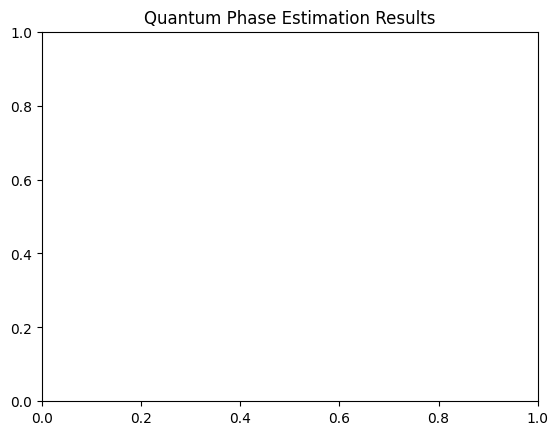


Circuit after Measurement:
     ┌───┐                            ┌───┐                                   »
q_0: ┤ H ├─■────────────────────────X─┤ H ├─■──────────────■──────────────────»
     ├───┤ │                        │ └───┘ │P(-π/2) ┌───┐ │                  »
q_1: ┤ H ├─┼────────■───────────────┼───────■────────┤ H ├─┼─────────■────────»
     ├───┤ │        │               │                └───┘ │P(-π/4)  │P(-π/2) »
q_2: ┤ H ├─┼────────┼────────■──────X──────────────────────■─────────■────────»
     ├───┤ │P(π/4)  │P(π/2)  │P(π)                                            »
q_3: ┤ X ├─■────────■────────■────────────────────────────────────────────────»
     └───┘                                                                    »
c: 3/═════════════════════════════════════════════════════════════════════════»
                                                                              »
«     ┌─┐           
«q_0: ┤M├───────────
«     └╥┘     ┌─┐   
«q_1: ─╫──────┤M├───
«      ║

In [14]:
# Quantum Phase Estimation (QPE) using Qiskit 2.x - Task 4: Inverse QFT Visualization

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np

def inverse_qft(qc, n):
    """Apply the inverse Quantum Fourier Transform on n qubits."""
    for qubit in range(n // 2):
        qc.swap(qubit, n - qubit - 1)
    for j in range(n):
        for k in range(j):
            qc.cp(-np.pi / 2 ** (j - k), k, j)
        qc.h(j)
    return qc


def qpe_circuit(num_count_qubits, theta):
    """
    Constructs the Quantum Phase Estimation (QPE) circuit.
    num_count_qubits: number of counting qubits
    theta: phase parameter (for U gate)
    """
    qc = QuantumCircuit(num_count_qubits + 1, num_count_qubits)

    # Step 1: Apply Hadamard gates on counting qubits
    qc.h(range(num_count_qubits))

    # Step 2: Prepare eigenstate (|1>) for the target qubit
    qc.x(num_count_qubits)

    # Step 3: Apply controlled unitary operations
    for qubit in range(num_count_qubits):
        qc.cp(2 * np.pi * theta * (2 ** qubit), qubit, num_count_qubits)

    # Step 4: Apply inverse QFT
    inverse_qft(qc, num_count_qubits)

    # ---- Visualization of Inverse QFT ----
    print("\nCircuit before Measurement:")
    print(qc.draw('text'))   # <-- visualize the circuit before measurement
    # plt.title("QPE Circuit with Inverse QFT Structure") # Remove matplotlib title
    # plt.show() # Remove matplotlib show

    # Step 5: Measure counting qubits
    qc.measure(range(num_count_qubits), range(num_count_qubits))

    return qc


def run_qpe(num_count_qubits=3, theta=0.125):
    """Executes the QPE circuit and visualizes the phase estimation result."""
    simulator = AerSimulator()
    qc = qpe_circuit(num_count_qubits, theta)
    compiled_circuit = transpile(qc, simulator)
    result = simulator.run(compiled_circuit, shots=2048).result()
    counts = result.get_counts()

    # Plot histogram of results
    plot_histogram(counts)
    plt.title("Quantum Phase Estimation Results")
    plt.show()

    print("\nCircuit after Measurement:")
    print(qc.draw(output='text'))


if __name__ == "__main__":
    num_count_qubits = 3
    theta = 0.125  # phase value (1/8)
    print(f"Running Quantum Phase Estimation with {num_count_qubits} counting qubits and phase {theta}")
    run_qpe(num_count_qubits, theta)

Running Quantum Phase Estimation with noise model for θ = 0.125


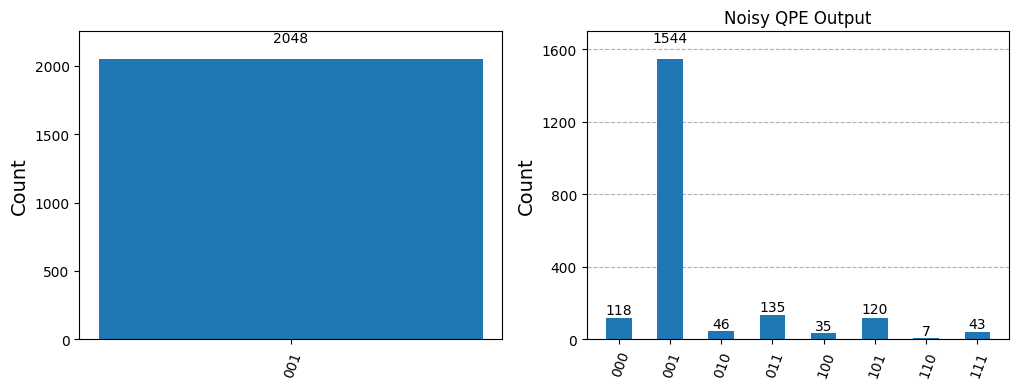


--- Comparison Summary ---
Theoretical phase θ = 0.125
Ideal run → clear, sharp peak at expected binary value.
Noisy run → distribution spread due to depolarizing + readout errors.

Circuit structure:
     ┌───┐                            ┌───┐                                   »
q_0: ┤ H ├─■────────────────────────X─┤ H ├─■──────────────■──────────────────»
     ├───┤ │                        │ └───┘ │P(-π/2) ┌───┐ │                  »
q_1: ┤ H ├─┼────────■───────────────┼───────■────────┤ H ├─┼─────────■────────»
     ├───┤ │        │               │                └───┘ │P(-π/4)  │P(-π/2) »
q_2: ┤ H ├─┼────────┼────────■──────X──────────────────────■─────────■────────»
     ├───┤ │P(π/4)  │P(π/2)  │P(π)                                            »
q_3: ┤ X ├─■────────■────────■────────────────────────────────────────────────»
     └───┘                                                                    »
c: 3/═════════════════════════════════════════════════════════════════════════

In [15]:
# Quantum Phase Estimation (QPE) using Qiskit 2.x - Task 5: Noise Simulation

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator, noise
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt


def inverse_qft(qc, n):
    """Apply the inverse Quantum Fourier Transform on n qubits."""
    for qubit in range(n // 2):
        qc.swap(qubit, n - qubit - 1)
    for j in range(n):
        for k in range(j):
            qc.cp(-np.pi / 2 ** (j - k), k, j)
        qc.h(j)
    return qc


def qpe_circuit(num_count_qubits, theta):
    """Construct the QPE circuit."""
    qc = QuantumCircuit(num_count_qubits + 1, num_count_qubits)
    qc.h(range(num_count_qubits))              # Step 1: Hadamards
    qc.x(num_count_qubits)                     # Step 2: Eigenstate |1>
    for qubit in range(num_count_qubits):      # Step 3: Controlled-U operations
        qc.cp(2 * np.pi * theta * (2 ** qubit), qubit, num_count_qubits)
    inverse_qft(qc, num_count_qubits)          # Step 4: Inverse QFT
    qc.measure(range(num_count_qubits), range(num_count_qubits))  # Step 5: Measurement
    return qc


def create_noise_model():
    """Create a realistic noise model for simulation."""
    noise_model = noise.NoiseModel()

    # Add depolarizing noise (simulates random gate errors)
    depolarizing_error = noise.depolarizing_error(0.01, 1)  # 1% single-qubit error
    depolarizing_error_2q = noise.depolarizing_error(0.02, 2)  # 2% two-qubit error

    # Add readout (measurement) error
    readout_error = noise.ReadoutError([[0.95, 0.05], [0.05, 0.95]])

    # Apply errors to gate types
    noise_model.add_all_qubit_quantum_error(depolarizing_error, ['h', 'x'])
    noise_model.add_all_qubit_quantum_error(depolarizing_error_2q, ['cp'])
    noise_model.add_all_qubit_readout_error(readout_error)

    return noise_model


def run_qpe_with_noise(num_count_qubits=3, theta=0.125):
    """Run QPE in both ideal and noisy conditions, then compare results."""
    # Ideal simulator
    ideal_sim = AerSimulator()
    qc = qpe_circuit(num_count_qubits, theta)
    compiled_ideal = transpile(qc, ideal_sim)
    ideal_result = ideal_sim.run(compiled_ideal, shots=2048).result()
    ideal_counts = ideal_result.get_counts()

    # Noisy simulator
    noise_model = create_noise_model()
    noisy_sim = AerSimulator(noise_model=noise_model)
    compiled_noisy = transpile(qc, noisy_sim)
    noisy_result = noisy_sim.run(compiled_noisy, shots=2048).result()
    noisy_counts = noisy_result.get_counts()

    # Plot comparison
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    plot_histogram(ideal_counts, ax=axs[0], title="Ideal QPE Output")
    plot_histogram(noisy_counts, ax=axs[1], title="Noisy QPE Output")
    plt.show()

    print("\n--- Comparison Summary ---")
    print(f"Theoretical phase θ = {theta}")
    print("Ideal run → clear, sharp peak at expected binary value.")
    print("Noisy run → distribution spread due to depolarizing + readout errors.")
    print("\nCircuit structure:")
    print(qc.draw(output='text'))


if __name__ == "__main__":
    num_count_qubits = 3
    theta = 0.125  # phase (1/8)
    print(f"Running Quantum Phase Estimation with noise model for θ = {theta}")
    run_qpe_with_noise(num_count_qubits, theta)
